# GPT

## (Generative Pre-Trained Transformer)

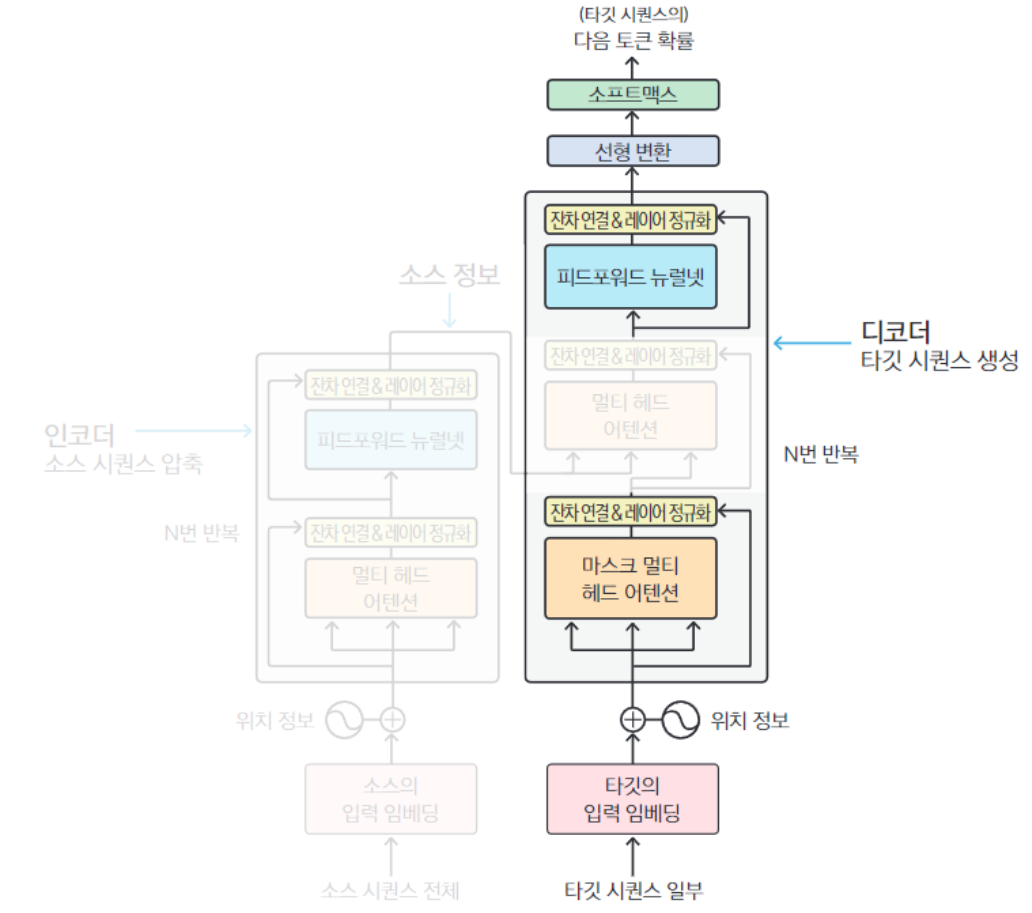

- GPT는 Transformer의 Decoder 구조를 사용하는 자연어 처리 모델 
- 자기 회귀 (Self-Regressive)방식으로 작동, 이전 단어들을 기반으로 다음 단어를 예측하는 형태로 작동 
- 단방향으로만 문장을 처리 

## GPT VS BERT 

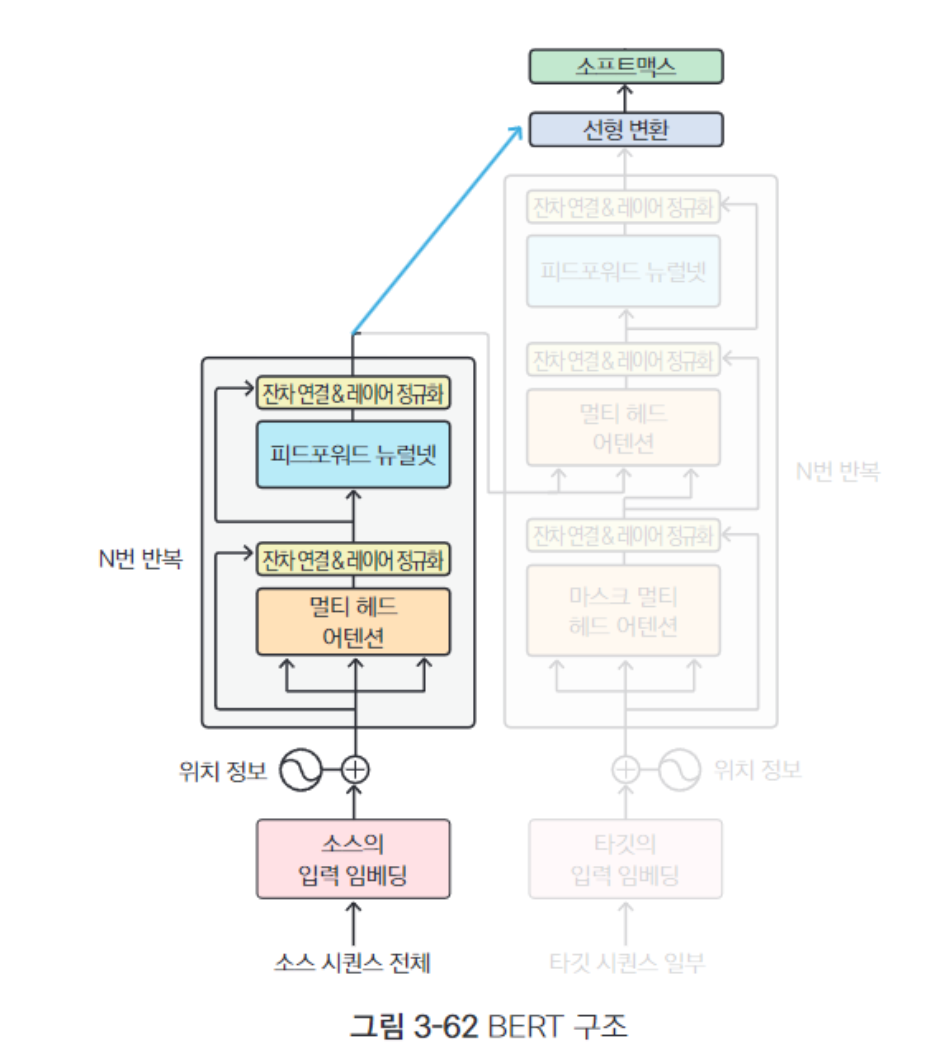

- **BERT**
    - BERT는 Transformer 모델의 Encoder구조 사용
    - MLM 방식으로, 양방향으로 문장을 처리 
    - BERT 특정 문맥에서 단어의 의미를 이해하는 것에 강점 

- **GPT** 
    - GPT는 Transformer의 Decoder구조를 사용 
    - GPT는 단방향으로 문장을 처리 / 자연스러운 텍스트를 생성하는데 강점 

In [2]:
from transformers import GPT2LMHeadModel
from transformers import PreTrainedTokenizerFast

In [3]:
def load_model():
    # GPT모델과 토크나이저를 다운로드 
    model_name = "skt/kogpt2-base-v2"
    model = GPT2LMHeadModel.from_pretrained(model_name)
    tokenizer = PreTrainedTokenizerFast.from_pretrained(model_name)
    return model, tokenizer

In [4]:
def generate_text(input_text, model, tokenizer):
    # 입력 텍스트를 토크나이징 한 뒤 모델에 전달 
    input_data = tokenizer.encode(input_text, return_tensors='pt')
    # 텍스트를 생성 
    outputs = model.generate(input_data, max_length=50, num_return_sequences=1)
    # 생성된 Seq 벡터를 문자로 변환 
    output_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return output_text

In [5]:
# 모델과 토크나이저 호출 
model, tokenizer = load_model()

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'GPT2Tokenizer'. 
The class this function is called from is 'PreTrainedTokenizerFast'.


In [6]:
# 텍스트 생성 실행 
input_text = "오늘 배고픈데 뭘 먹을까?"
output_text= generate_text(input_text, model, tokenizer)
output_text

'오늘 배고픈데 뭘 먹을까? ᄏᄏᄏᄏᄏᄏᄏᄏᄏᄏᄏᄏᄏᄏᄏᄏᄏᄏᄏᄏᄏᄏᄏᄏᄏᄏᄏᄏᄏᄏᄏᄏᄏᄏᄏᄏᄏᄏᄏᄏ'

In [7]:
input_text = "다음 프로젝트 주제는 뭘로 하는게 좋을지?"
output_text= generate_text(input_text, model, tokenizer)
output_text

'다음 프로젝트 주제는 뭘로 하는게 좋을지?"라며 "그런데 이게 뭔지 모르겠다. 뭔가 새로운 것을 만들어야 하는 것 같다"고 말했다.\n그는 "그런데 이게 뭔지 모르겠다. 뭔'

In [8]:
input_text = "안녕하세요?"
output_text= generate_text(input_text, model, tokenizer)
output_text

'안녕하세요?"\n"그럼, 그건 뭐예요?"\n"그럼, 그건 뭐예요?"\n"그럼, 그건 뭐예요?"\n"그럼, 그건 뭐예요?"\n'

# GPT Hyper-Parameter Tuning 

- Greedy Search : 각 시점에서 가장 높은 확률을 가진 단어를 선택 
- Beam Search : 한 시점에서 여러개의 가장 가능성 있는 후보를 유지하며 탐색해 선택
- Repetition Penalty : 반복적인 단어나 문장을 피하기 위해 패널티를 적용 
    - 모델이 출력하는 결과의 다양성 보장 -> 좀 더 자연스러운 문장 생성 

In [9]:
def generate_text(input_text, model, tokenizer):
    input_data = tokenizer.encode(input_text, return_tensors='pt')
    # Greedy Search 기법을 적용 
    outputs = model.generate(input_data,
                             max_length=30, # 문장 최대 길이 축소 
                             do_sample = False, # Greedy Search 기법 적용  
                             num_beams = 3, # Beam Search 기법 적용  
                             no_repeat_ngram_size=3,
                             # 특정 토큰이 3회이상 등장할 경우
                             # 3번째 토큰의 확률을 0 
                             repetition_penalty = 1.5, 
                             num_return_sequences=1)
    output_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return output_text

In [10]:
input_text = "오늘 배고픈데 뭘 먹을까?"
generate_text(input_text, model, tokenizer)

'오늘 배고픈데 뭘 먹을까?"\n"아니야. 그게 무슨 소리야?"\n"그냥 먹어도 되잖아'

In [11]:
input_text = "안녕하세요?"
generate_text(input_text, model, tokenizer)

'안녕하세요?"\n"그렇지 않습니다."\n"아니오. 그게 무슨 말씀이십니까?"\n나는 고개를 끄'

- **Sampling 기법**
- 문장 생성 방식을 단어의 확률 분포를 이용하는 것이 아닌, 샘플링 방식을 활용해, 특정 토큰이 다음 등장할 확률이 가장 높은 특정 개수의 단어를 뽑아 생성 
- Top-K Sampling 
    - 모델이 각 단계에서 생성할 다음 단어의 후보로 가장 가능성이 높은 K개의 단어를 뽑아, 무작위로 선택 
    - 선택가능한 후보군을 제한하면서도 여러 선택지 중 하나를 무작위로 선택함으로 다양성이 부여 / 자연스러움도 유지가 됌 

In [13]:
def generate_text(input_text, model, tokenizer):
    input_data = tokenizer.encode(input_text, return_tensors='pt')
    # Sampling (top-K) 기법을 적용 
    outputs = model.generate(input_data,
                             max_length=30, # 문장 최대 길이 축소 
                             do_sample = True, # Sampling 기법 적용  
                             top_k = 40, # 확률이 높은 40개의 단어중 무작위로 선택 
                             no_repeat_ngram_size=3,
                             repetition_penalty = 1.5, 
                             num_return_sequences=1)
    output_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return output_text

In [14]:
generate_text("오늘 배고픈데 뭘 먹을까?", model, tokenizer)

'오늘 배고픈데 뭘 먹을까? 하고 고민하다가 어느 순간부터 먹는 거보다 맛있는 순대국밥이 생각났고,\n식당에'

In [15]:
generate_text("안녕하세요?", model, tokenizer)

'안녕하세요?"라고 묻자, 김씨는 "아직 네가 이대목동병원에 입원했구나. 너희들도 다 알아'

- Temperature Sampling
    - 모델이 계산한 확률 분포의 일부를 더 키우거나 줄이는 방식으로, 각 단어의 출현확률을 평탄화 하거나 (확률이 적은 다른 단어가 등장할 가능성을 높아짐 -> 다양성)또는 각 단어의 출현확률의 차이를 극대화하는 (등장 확률이 높은 단어의 확률값이 커지면서 ->일관성 유지)방향으로 샘플링 

- T = 1 : 단어의 본래 출현 확률을 그대로 유지 
- T > 1 : 단어의 출현 확률을 평탄화 (유연성, 다양성 증대)
- T < 1 : 단어의 출현 확률을 극대화 (일관성 증대) 

In [26]:
def generate_text(input_text, model, tokenizer):
    input_data = tokenizer.encode(input_text, return_tensors='pt')
    # Sampling (Temperature) 기법을 적용 
    outputs = model.generate(input_data,
                             max_length=30, # 문장 최대 길이 축소 
                             do_sample = True, # Sampling 기법 적용  
                             top_k = 40, # 확률이 높은 40개의 단어중 무작위로 선택 
                             temperature = 10.0, # 분포를 평탄화 (다양성 증대)
                             no_repeat_ngram_size=3,
                             repetition_penalty = 1.5, 
                             num_return_sequences=1)
    output_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return output_text

In [27]:
generate_text("오늘 배고픈데 뭘 먹을까?", model, tokenizer)

'오늘 배고픈데 뭘 먹을까? 나 뭐라고 말을 안하는 것은 아닌걸", 특히 이번 사태를 의식하다\n소속 언론사를 향해 불편한'

In [28]:
generate_text("안녕하세요? 저는 ", model, tokenizer)

'안녕하세요? 저는 땡볕과 바람이 아주 조금이나 마실 것 같아 그냥 시원하지만 아무 탈 없을 때까지는 제가 다 마시고 나'